## Péndulo simple.


## Definición:

Un péndulo gravitatorio simple es un modelo matemático idealizado de un péndulo real. Se trata de un peso en el extremo de una cuerda sin masa suspendida de un pivote, sin fricción. Como en el modelo no hay pérdida de energía por fricción, cuando se le da un desplazamiento inicial oscila hacia adelante y hacia atrás con una amplitud constante. El modelo se basa en las siguientes hipótesis:

* La varilla o cuerda no tiene masa, es inextensible y permanece siempre bajo tensión.
* La pesa es una masa puntual.
* El movimiento se produce en dos dimensiones.
* El movimiento no pierde energía por la fricción externa o la resistencia del aire.
* El campo gravitatorio es uniforme.
* El soporte es inmóvil.

### Ecuaciones

La ecuación diferencial que rige el movimiento de un péndulo simple es:

\begin{equation}
\frac{d^2 \theta}{d t^2}+\frac{g}{\ell} \sin \theta=0
\end{equation}

donde g es la magnitud del campo gravitatorio, ℓ es la longitud de la varilla o cuerda, y θ es el ángulo respecto a la vertical del péndulo.

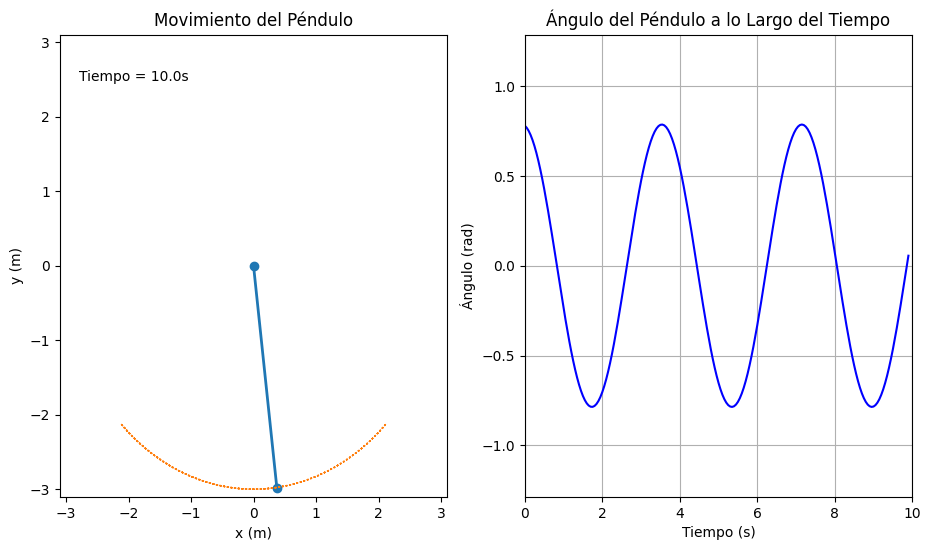

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# Definición de la clase Pendulo
class Pendulo:
    def __init__(self, longitud, angulo_inicial, velocidad_inicial=0, gravedad=9.81):
        self.longitud = longitud            # Longitud del péndulo (m)
        self.angulo = angulo_inicial        # Ángulo inicial (radianes)
        self.velocidad_angular = velocidad_inicial  # Velocidad angular inicial (rad/s)
        self.gravedad = gravedad            # Aceleración de la gravedad (m/s^2)
    
    # Método para calcular la aceleración angular
    def aceleracion_angular(self):
        return -(self.gravedad / self.longitud) * np.sin(self.angulo)
    
    # Método para actualizar el estado del péndulo en función del tiempo (método de Euler)
    def actualizar(self, dt):
        aceleracion = self.aceleracion_angular()
        self.velocidad_angular += aceleracion * dt
        self.angulo += self.velocidad_angular * dt

# Parámetros del péndulo
longitud = 3.0           # Longitud del péndulo (m)
angulo_inicial = np.pi / 4  # Ángulo inicial (45 grados en radianes)
velocidad_inicial = 0
dt = 0.05                 # Paso de tiempo (s), incrementado para menos fotogramas
tiempo_total = 10         # Tiempo total de la simulación (s), reducido a 5 segundos

# Crear instancia de la clase Pendulo
pendulo = Pendulo(longitud, angulo_inicial, velocidad_inicial)

# Listas para almacenar los resultados de la simulación
tiempos = np.arange(0, tiempo_total, dt)
angulos = []
trayectoria_x = []  # Lista para almacenar las posiciones x del rastro
trayectoria_y = []  # Lista para almacenar las posiciones y del rastro

# Simulación del péndulo
for t in tiempos:
    pendulo.actualizar(dt)
    angulos.append(pendulo.angulo)

# Configuración para la animación
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 6))  # Dos subgráficas en una fila

# Subgráfico 1: Movimiento del péndulo
ax1.set_xlim(-longitud - 0.1, longitud + 0.1)
ax1.set_ylim(-longitud - 0.1, longitud + 0.1)
linea_pendulo, = ax1.plot([], [], 'o-', lw=2)
rastro, = ax1.plot([], [], ':', lw=1, ms=2)
tiempo_template = 'Tiempo = %.1fs'
tiempo_text = ax1.text(0.05, 0.9, '', transform=ax1.transAxes)
ax1.set_title("Movimiento del Péndulo")
ax1.set_xlabel("x (m)")
ax1.set_ylabel("y (m)")

# Subgráfico 2: Gráfica del ángulo
ax2.set_xlim(0, tiempo_total)
ax2.set_ylim(min(angulos) - 0.5, max(angulos) + 0.5)
linea_grafica, = ax2.plot([], [], 'b-')
ax2.set_title("Ángulo del Péndulo a lo Largo del Tiempo")
ax2.set_xlabel("Tiempo (s)")
ax2.set_ylabel("Ángulo (rad)")
ax2.grid(True)

# Función para inicializar la animación
def init():
    linea_pendulo.set_data([], [])
    rastro.set_data([], [])
    linea_grafica.set_data([], [])
    return linea_pendulo, rastro, linea_grafica

# Función para actualizar la animación en cada cuadro
def update(i):
    # Actualización del péndulo
    x = longitud * np.sin(angulos[i])
    y = -longitud * np.cos(angulos[i])
    
    # Actualizamos la posición del péndulo
    linea_pendulo.set_data([0, x], [0, y])
    
    # Agregar las posiciones actuales al rastro
    trayectoria_x.append(x)
    trayectoria_y.append(y)
    
    # Dibujar la trayectoria (rastro)
    rastro.set_data(trayectoria_x, trayectoria_y)
    
    # Cuadrito de tiempo
    tiempo_text.set_text(tiempo_template % (i*dt))
    
    # Actualización de la gráfica del ángulo
    xdata = tiempos[:i]
    ydata = angulos[:i]
    linea_grafica.set_data(xdata, ydata)
    
    return linea_pendulo, rastro, linea_grafica, tiempo_text

# Crear animación
anim = FuncAnimation(fig, update, frames=len(tiempos), init_func=init, blit=True, interval=dt*1000)

# Guardar la animación como GIF
gif_writer = PillowWriter(fps=24)
anim.save("pendulo_simple.gif", writer=gif_writer)

plt.show()

